In [9]:
import os

os.environ["GEOMSTATS_BACKEND"] = "pytorch"


import geomstats.backend as gs
import matplotlib.pyplot as plt
import torch

import neural_metric

In [11]:
model_filename = "results/trained_models/experimental_2022-08-16 21:04:00_model.pt"
model = torch.load(model_filename)
model.eval()

VAE(
  (fc1): Linear(in_features=40, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=400, bias=True)
  (fc_z_mu): Linear(in_features=400, out_features=2, bias=True)
  (fc_z_logvar): Linear(in_features=400, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=400, bias=True)
  (fc_x_mu): Linear(in_features=400, out_features=40, bias=True)
  (fc_x_logvar1): Linear(in_features=400, out_features=400, bias=True)
  (fc_x_logvar2): Linear(in_features=400, out_features=40, bias=True)
)

In [12]:
neural_immersion = neural_metric.get_neural_immersion(model)

metric = neural_metric.NeuralMetric(dim=1, embedding_dim=2, immersion=neural_immersion)

theta = gs.array(gs.pi / 6)

mean_curvature = metric.mean_curvature(theta)
gs.linalg.norm(mean_curvature)

tensor(0.0706)

In [13]:
mean_curvature = []
thetas = gs.linspace(0, 2 * gs.pi, 200)

for theta in thetas:
    mean_curvature.append(metric.mean_curvature(theta))

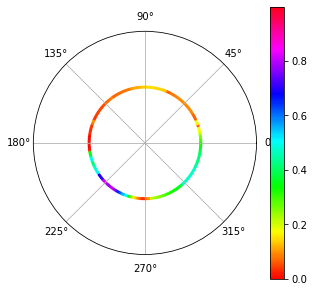

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

xval = np.linspace(0, 2 * np.pi, 200)
yval = np.ones_like(xval)


colormap = plt.get_cmap("hsv")

## Reference color plot

norm = mpl.colors.Normalize(0.0, 2 * np.pi)

mean_curvature_norm = [gs.linalg.norm(vec) for vec in mean_curvature]

# ax1 = plt.subplot(1, 2, 1, polar=True)
# ax1.scatter(xval, yval, c=xval, s=15, cmap=colormap, norm=norm, linewidths=0)


## Plot mean curvature norm

color_norm = mpl.colors.Normalize(0.0, 1.2 * max(mean_curvature_norm))
plt.figure(figsize=(5, 5))

ax2 = plt.subplot(polar=True)
sc = ax2.scatter(
    xval,
    yval,
    c=mean_curvature_norm,
    s=10,
    cmap=colormap,
    norm=color_norm,
    linewidths=0,
)
# ax1.set_yticks([])
ax2.set_yticks([])

plt.colorbar(sc)

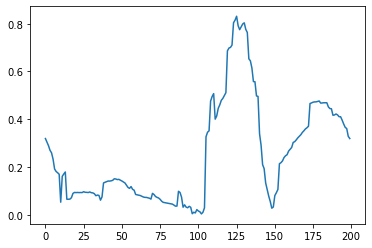

In [15]:
mean_curvature_norm = [gs.linalg.norm(vec) for vec in mean_curvature]
plt.plot(mean_curvature_norm)